# <center> Introduction to Reinforcement Learning</center>

# Setup

#### Let us first make sure that all the required dependencies are installed

In [1]:
running_locally = True

In [2]:
import sys, os

if running_locally:
  !pip install gym matplotlib
  sys.path.append('Support')
  sys.path.insert(0, os.path.abspath('Support'))
  ckp_test = 'Support/data/ValueIteration_TestCase.pk'
else:
  !pip install gym
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)
  sys.path.append('/content/gdrive/MyDrive/Colab/ECE4078_2021_Practicals/Week07/Support')
  sys.path.insert(1, os.path.abspath('/content/gdrive/MyDrive/Colab/ECE4078_2021_Practicals/Week07/Support'))
  ckp_test = '/content/gdrive/MyDrive/Colab/ECE4078_2021_Practicals/Week07/Support/data/ValueIteration_TestCase.pk'
  !ls '/content/gdrive/MyDrive/Colab/ECE4078_2021_Practicals/Week07/Support'

#### Import dependencies

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pickle

import sys
import os

from gym_simple_gridworlds.envs.grid_env import GridEnv
from gym_simple_gridworlds.envs.grid_2dplot import *
from gym_simple_gridworlds.helper import *

#### Set up a wide cell view

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Coding Exercise (6 pts) - Implement Value Iteration

You are tasked with implementing the value iteration algorithm shown below:
    
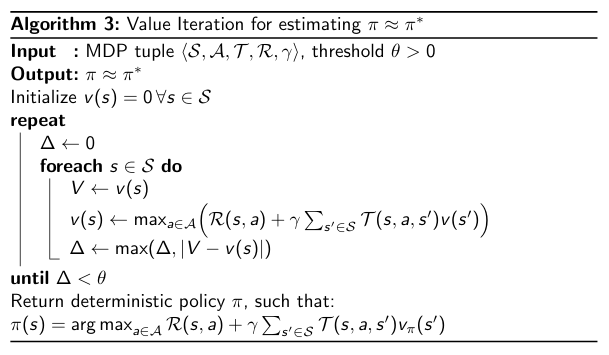

Please keep in mind:
- **TODO 1**: Use the helper method ``one_step_look_ahead(.)`` in ``Support/gym_simple_gridworlds/helper.py`` to update of your current $v(s)$ according to:
$v(s) \leftarrow \max_{a \in \mathcal{A}} \Bigl(\mathcal{R}(s,a) + \gamma\sum_{s' \in \mathcal{S}}\mathcal{T}(s,a,s')v(s')\Bigr)$
- **TODo 2**: Use the helper method ``update_policy(.)`` in ``Support/gym_simple_gridworlds/helper.py`` to obtain the deterministic optimal policy $\pi^*$ associated to your $v^*(s)$ estimate

Expected return:
- Your implementation should return the state-value function (dictionary) and the optimal policy (matrix form)

For grading:
- You will be graded based on the output of the ``value_iteration(.)`` method. Please make sure that your solution returns the expected variables with the correct type (no rounding is needed)
- Remove all print statements from your code before submitting your solution

In [5]:
def value_iteration(grid_env, threshold=0.00001, plot=False):
    """
    This function iteratively computes optimal state-value function for a given environment grid_env. 
    It returns the optimal state-value function and its associated optimal policy
    
    :param grid_env (GridEnv): MDP environment
    :param threshoold (float): Convergence threshold
    :param plot (bool): Bool argument indicating if value function and policy should be displayed 
    :return: (tuple) Optimal state-value funciton (dict) and deterministic optimal policy (matrix)
    """
    
    #1. Get list of states in environment
    states = grid_env.get_states()
    
    #2. Initialize v function
    v = {s: 0.0 for s in grid_env.get_states()}
    
    #3. Set convergence threshold and error variable
    theta = threshold
    delta = 1000
    
    #4. Update v(s) until convergence
    while delta > theta:
        
        delta = 0
        for s in states:
            old_v = v[s]
            v[s] = np.max(one_step_look_ahead(grid_env, s, v))
            delta = max(delta, abs(old_v - v[s]))
            
    #5. Compute deterministic policy given v(s)
    temp_policy = np.ones(grid_env.grid.shape) * -1
    optimal_policy = update_policy(grid_env, temp_policy, v)
    
    
    if plot:
        plot_value_function(grid_env, v)
        plot_policy(grid_env, optimal_policy)
        
    return v, optimal_policy    

### Test your implementation

Given an grid world environment with the following attributes:
- Discount factor $\gamma = 0.9$ (class attribute ``gamma=0.9``)
- Stochastic transition matrix (class attribute ``noise=0.2``)
- Rewards are only obtained at terminal states (class attribute ``living_reward=0.0``)



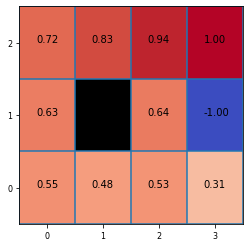

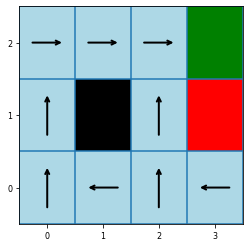

In [6]:
# Create a grid world mdp
grid_world = GridEnv(gamma=0.9, noise=0.2, living_reward=0)

optimal_state_function, optimal_policy = value_iteration(grid_world, plot=True)

Compare your state-value function and optimal policy to the values provided in the test file ``Support/data/ValueIteration_TestCase.pk``:

(<Figure size 288x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e9f80cfe08>)

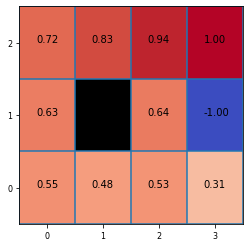

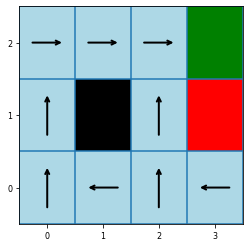

In [7]:
import pickle
 
with open(ckp_test, 'rb') as read_from:
    test_values = pickle.load(read_from)
 
test_v = test_values['value_state_function']
test_p = test_values['optimal_policy']

plot_value_function(grid_world, test_v)
plot_policy(grid_world, test_p)

In [8]:
# Helper code to save test cases for marking
import pickle

test_case = {'gamma': 0.9, 'noise': 0.2, 'living_reward': 0, 
             'value_state_function': optimal_state_function,
             'optimal_policy': optimal_policy}

with open(ckp_test, 'wb') as write_to:
    pickle.dump(test_case, write_to)